In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification, SquaredClassification

from block_analysis import *
from derivation import get_hessian_grad_block, block_norm

## Helpers

In [2]:
def get_model_ds_loss():    
    model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
    ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
                   out_dim, nsamp, device)
    loss_fn = LinearClassification(out_dim)
    return model, ds, loss_fn

## Params

In [6]:
# Model
mode = "linear"
bias = False
nlayer = 4
inp_dim = 10 
out_dim = 10
hid_dim = 10

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 1

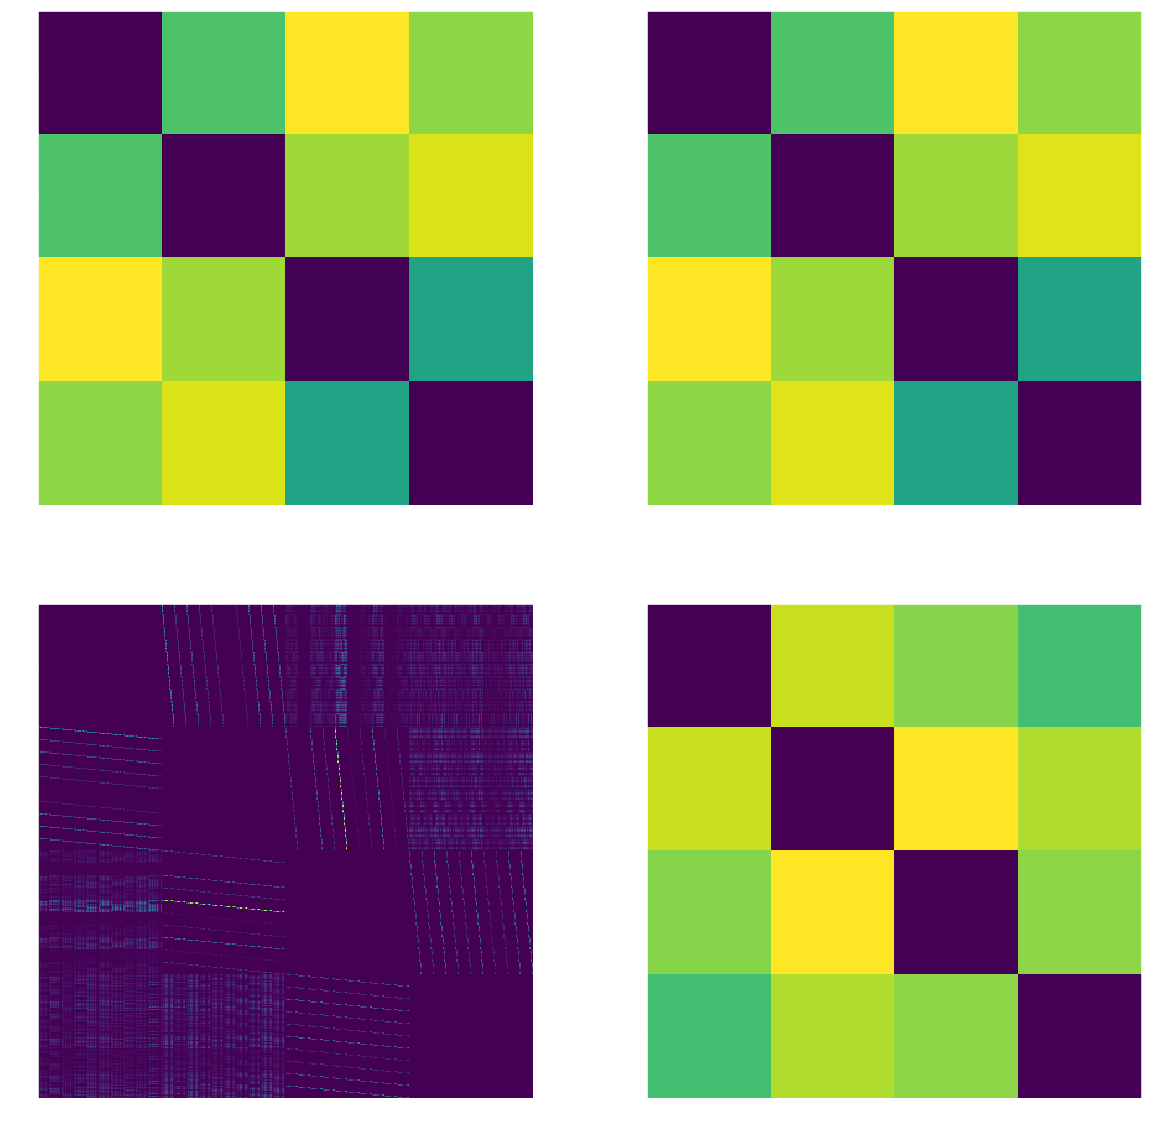

In [7]:
model, ds, loss_fn = get_model_ds_loss()
H_ = block_hessian(model, ds, loss_fn, lr=1)
H, grads, BH = get_hessian_grad_block(model, ds, loss_fn)
HBN = block_norm(H, grads)

fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0,0].imshow(H_.abs())
ax[0,1].imshow(BH.abs())
ax[1,0].imshow(H.abs())
ax[1,1].imshow(HBN.abs())